In [1]:
import pandas as pd
import numpy as np
import re
from nltk import sent_tokenize,word_tokenize 

# Data Cleaning

In [2]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name
clean=["we","our","us","itself","employees","firm","apply","disabilities",
       "re","company","description","accomendation","\nWe","relocation","location"]
def clean_JD(jd,name):
    if len(name)>1:
        s=""
        try:
            for i in name:
                s+=i[0]
            name+=[s]
        except:
            pass
    res=""
    for sentence in sent_tokenize(jd):
        for j in sentence.split("\n"):
            if not j: continue
            sent=[]
            for x in word_tokenize(j):
                if x.isalnum():
                    sent.append(x.lower())
            A=set(sent)
            B=set(name+clean)
            if not A&B:
                res+=j+"\n"
    return res if res else None
def split_by_slash(a):
    if str(a).find("\n")!=-1:
        a = a.split("\n")[0]
    a=a.replace("-"," ")
    return [x.lower() for x in word_tokenize(a) if x.isalnum()]

In [3]:
def data_clean(df):
    name = get_df_name(df)
    checklist={"BA":"Business Analyst","DA":"Data Analyst","DE":"Data Engineer","DS":"Data Scientist"}
    df=df.rename(columns={"Job Title":"JT","Job Description":"JD","Salary Estimate":"Salary"})
    
    #filter out columns that do not have role title in the name
    df=df[df.JT.str.contains(checklist[name], regex= True, na=False)]
    df=df[["JT","Salary","JD","Company Name"]]
    
    #get name
    df["Company Name"] =df.apply(lambda x: split_by_slash(x['Company Name']),axis=1)
    #filter out sentences in JD that has the company name or common words 
    df['JD'] =df.apply(lambda x: clean_JD(x['JD'],x['Company Name']),axis=1)

    df=df.dropna()
    df.reset_index(inplace=True)
    return df
    

# BA Dataset

In [4]:
BA = pd.read_csv("BusinessAnalyst.csv")
part1=BA[:3691]
part1.drop("Unnamed: 0" , axis=1, inplace=True)
part1.drop("index" , axis=1, inplace=True)
part2=BA[3692:]
part2.columns=["Job Title","Salary Estimate","Job Description","Rating","Company Name","Location","Headquarters","Size","Founded","Type of ownership","Industry","Sector","Revenue","Competitors","Easy Apply","A","B"]
part2.drop("A" , axis=1, inplace=True)
part2.drop("B" , axis=1, inplace=True)
BA=pd.concat([part1,part2])

/Users/nanliao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
df_BA=data_clean(BA)

In [6]:
df_BA

,index,JT,Salary,JD,Company Name
0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),You will:\nSupport agile team in translating e...,"[memorial, sloan, kettering, msk]"
1,1,Business Analyst,$56K-$102K (Glassdoor est.),If you enjoy working in a highly collaborative...,"[paine, schwartz, partners, psp]"
2,8,Tolling Business Analyst,$56K-$102K (Glassdoor est.),Excellence Delivered As Promised.\nIt’s more t...,"[gannett, fleming, gf]"
3,9,Business Analyst - Risk,$56K-$102K (Glassdoor est.),This global practice supports clients in many ...,[mckinsey]
4,14,Business Analyst,$56K-$102K (Glassdoor est.),Business Analysts roles are targeted at gradua...,[efficio]
...,...,...,...,...,...
1658,3931,Business Analyst Fresher,$45K-$110K (Glassdoor est.),Junior Business Analyst\nAs the Business Analy...,"[staffigo, technical, services, llc, stsl]"
1659,3935,SAS Developer and Business Analyst (Security/F...,$30K-$57K (Glassdoor est.),The Business Senior Analyst is an intermediate...,[citibank]
1660,3966,Business Analyst - Loan IQ Specialist,$28K-$54K (Glassdoor est.),Back to job search\nBusiness Analyst - Loan IQ...,"[delaware, investments, colorado, municipal, i..."
1661,4014,Business Analyst Fresher,$47K-$105K (Glassdoor est.),Junior Business Analyst\nAs the Business Analy...,"[staffigo, technical, services, llc, stsl]"


# DA Dataset

In [7]:
DA=pd.read_csv("DataAnalyst.csv")
DA=DA.dropna()

In [8]:
df_DA=data_clean(DA)

In [9]:
df_DA

,index,JT,Salary,JD,Company Name
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,"[vera, institute, of, justice, vioj]"
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\nProvides support and analytical insi...,"[visiting, nurse, service, of, new, york, vnsony]"
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),"In this role, you’ll have the opportunity to b...",[squarespace]
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nIntr...,[celerity]
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),TVG — The best-in-class horse racing TV/media ...,[fanduel]
...,...,...,...,...,...
3978,5626,Data Analyst (Power BI + SAP),$51K-$93K (Glassdoor est.),This dynamic role will require the candidate t...,"[kore1, technologies, kt]"
3979,5627,Technical Business or Data Analyst,$46K-$72K (Glassdoor est.),Hi\nHope you are doing great\nPlease go throug...,"[adwait, algorithm, aa]"
3980,5628,Data Analyst Junior,$44K-$82K (Glassdoor est.),"Interpret data, analyze results using statisti...","[staffigo, technical, services, llc, stsl]"
3981,5629,Sr. HR Data Analyst,$44K-$82K (Glassdoor est.),POSITION SUMMARY:\nThey will also analyze data...,[cepheid]


# Data Scientist

In [10]:
DS=pd.read_csv("DataScientist.csv")

In [11]:
df_DS=data_clean(DS)

In [12]:
df_DS

,index,JT,Salary,JD,Company Name
0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),The app has received high praise in the form o...,[hopper]
1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),You have 4+ years of experience as a Data Scie...,"[noom, us, nu]"
2,5,Data Scientist,$111K-$181K (Glassdoor est.),Job Brief\nThe ideal candidate will have previ...,"[ifg, companies, ic]"
3,10,Data Scientist,$111K-$181K (Glassdoor est.),Backed by $153MM in venture funding from top i...,"[quartet, health, qh]"
4,11,Data Scientist/Machine Learning,$111K-$181K (Glassdoor est.),"PulsePoint™, a global programmatic advertising...",[pulsepoint]
...,...,...,...,...,...
968,3804,Senior Data Scientist *,$52K-$94K (Glassdoor est.),There is no shortage of computational and stat...,"[root, insurance, ri]"
969,3809,Data Scientist - BFSI,$52K-$94K (Glassdoor est.),Good understanding of machine learning and dat...,"[tephra, inc, ti]"
970,3818,"Sr. Data Scientist (Columbus, Ohio)",$52K-$94K (Glassdoor est.),You will collaborate with cross-functional tea...,"[tiger, analytics, ta]"
971,3819,"Data Scientist Lead, Capacity Planning & Analy...",$52K-$94K (Glassdoor est.),The Business Planning and Analysis (BP&A) team...,"[jpmorgan, chase, bank, jcb]"


# Data Engineer

In [13]:
DE=pd.read_csv("DataEngineer.csv")

In [14]:
df_DE=data_clean(DE)

In [15]:
df_DE

,index,JT,Salary,JD,Company Name
0,0,Data Engineer,$80K-$150K (Glassdoor est.),**\nJob Overview\nAlong with the requirements ...,[sagence]
1,1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n- Architect, build, and ...","[enterprise, integration, ei]"
2,2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\nPosition Overview:\nSeeking a highly...,"[maestro, technologies, mt]"
3,4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\nJob Details\nLevel\nExperienced...,"[gny, insurance, companies, gic]"
4,6,Senior Data Engineer,$80K-$150K (Glassdoor est.),Senior Data Engineer\nMaster’s degree in Infor...,"[affinity, solutions, as]"
...,...,...,...,...,...
1162,2500,Federal - Data Engineer - Senior,$56K-$89K (Glassdoor est.),Organization: Accenture Federal Services\nAcce...,"[solekai, systems, corp, ssc]"
1163,2503,Sr Data Engineer Hadoop,$56K-$89K (Glassdoor est.),"Job Responsibilities\nWrite well designed, tes...","[ntt, data, nd]"
1164,2504,Senior Big Data Engineer,$56K-$89K (Glassdoor est.),"Your Opportunity\nThey help Marketing, Finance...",[schwab]
1165,2514,Digital SW Eng Lead/Data Engineer,$76K-$128K (Glassdoor est.),"Digital SW Eng Lead/Data Engineer\nIrving, TX\...","[technocraft, solutions, ts]"


In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def wc(df):    
    res=""
    for i,row in df.iterrows():
        res+=row['JD']
    %matplotlib inline
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(res)


    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

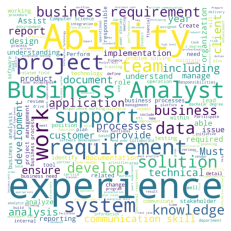

In [17]:
wc(df_BA)

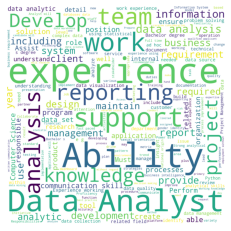

In [18]:
wc(df_DA)

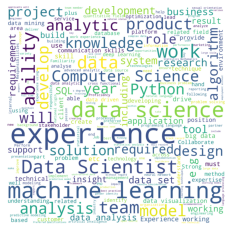

In [19]:
wc(df_DS)

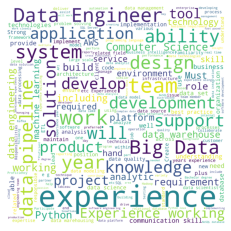

In [20]:
wc(df_DE)

# JD List Matching

In [130]:
from collections import Counter
import nltk
import string
from nltk.tokenize import word_tokenize
import math

In [131]:
# got these keywords by looking at some examples and using existing knowledge.
tool_keywords1 = ['python', 'pytorch', 'sql', 'mxnet', 'mlflow', 'einstein', 'theano', 'pyspark', 'solr', 'mahout', 
 'cassandra', 'aws', 'powerpoint', 'spark', 'pig', 'sas', 'java', 'nosql', 'docker', 'salesforce', 'scala', 'r',
 'c', 'c++', 'net', 'tableau', 'pandas', 'scikitlearn', 'sklearn', 'matlab','keras', 'tensorflow', 'clojure',
 'caffe', 'scipy', 'numpy', 'matplotlib', 'vba', 'spss', 'linux', 'azure', 'cloud', 'gcp', 'mongodb', 'mysql', 'oracle', 
 'redshift', 'snowflake', 'kafka', 'javascript', 'qlik', 'jupyter', 'perl', 'bigquery', 'unix', 'react',
 'scikit', 'powerbi', 's3', 'ec2', 'lambda', 'ssrs', 'kubernetes', 'hana', 'spacy', 'tf', 'django', 'sagemaker',
 'seaborn', 'mllib', 'github', 'git', 'elasticsearch', 'splunk', 'airflow', 'looker', 'rapidminer', 'birt', 'pentaho', 
 'jquery', 'nodejs', 'd3', 'plotly', 'bokeh', 'xgboost', 'rstudio', 'shiny', 'dash', 'h20', 'h2o', 'hadoop', 'mapreduce', 
 'hive', 'cognos', 'angular', 'nltk', 'flask', 'node', 'firebase', 'bigtable', 'rust', 'php', 'cntk', 'lightgbm', 
 'kubeflow', 'rpython', 'unixlinux', 'postgressql', 'postgresql', 'postgres', 'hbase', 'dask', 'ruby', 'julia', 'tensor',
# added r packages doesn't seem to impact the result
 'dplyr','ggplot2','esquisse','bioconductor','shiny','lubridate','knitr','mlr','quanteda','dt','rcrawler','caret','rmarkdown',
 'leaflet','janitor','ggvis','plotly','rcharts','rbokeh','broom','stringr','magrittr','slidify','rvest',
 'rmysql','rsqlite','prophet','glmnet','text2vec','snowballc','quantmod','rstan','swirl','datasciencer',
'c#','excel','microsoft','erp','tableau','vba','jira','git','postgresql','db','bi']


# another set of keywords that are longer than one word.
tool_keywords2 = set(['amazon web services', 'google cloud','power bi','erp system','ms office'])


In [140]:
# hard skills/knowledge required.
skill_keywords1 = set(['statistics', 'cleansing', 'chatbot', 'cleaning', 'blockchain', 'causality', 'correlation', 'bandit', 'anomaly', 'kpi',
 'dashboard', 'geospatial', 'ocr', 'econometrics', 'pca', 'gis', 'svm', 'svd', 'tuning', 'hyperparameter', 'hypothesis',
 'salesforcecom', 'segmentation', 'biostatistics', 'unsupervised', 'supervised', 'exploratory',
 'recommender', 'recommendations','sequencing', 'probability', 'reinforcement', 'graph', 'bioinformatics',
 'chi', 'knn', 'outlier', 'etl', 'normalization', 'classification', 'optimizing', 'prediction', 'forecasting',
 'clustering', 'cluster', 'optimization', 'visualization', 
 'regression', 'logistic', 'nn', 'cnn', 'glm','nlp','economics','math','engineering'
 'rnn', 'lstm', 'gbm', 'boosting', 'recurrent', 'convolutional', 'bayesian','analyze','research',
'healthcare','risk','finance','accounting','hardware','pipeline','communication',
 'bayes'])


# another set of keywords that are longer than one word.
skill_keywords2 = set(['random forest', 'natural language processing', 'machine learning', 'decision tree', 'deep learning', 'experimental design',
 'time series', 'nearest neighbors', 'neural network', 'support vector machine', 'computer vision', 'dimensionality reduction', 
 'text analytics', 'a b testing', 'ab testing', 'chat bot', 'data mining','problem solving','project management'
'computer science','information technology','data modeling', 'data warehousing','end user',
'financial modeling','multivariate testing','database deployment','big data'])

In [141]:
degree_dict = {'bs': 1, 'bachelor': 1, 'undergraduate': 1, 
               'master': 2, 'graduate': 2, 'mba': 2.5, 
               'phd': 3, 'ph.d': 3, 'ba': 1, 'ma': 2,
               'postdoctoral': 4, 'postdoc': 4, 'doctorate': 3}


degree_dict2 = {'advanced degree': 2, 'ms or': 2, 'ms degree': 2, '4 year degree': 1, 'bs/': 1, 'ba/': 1,
                '4-year degree': 1, 'b.s.': 1, 'm.s.': 2, 'm.s': 2, 'b.s': 1, 'phd/': 3, 'ph.d.': 3, 'ms/': 2,
                'm.s/': 2, 'm.s./': 2, 'msc/': 2, 'master/': 2, 'master\'s/': 2, 'bachelor\s/': 1}
degree_keywords2 = set(degree_dict2.keys())

In [142]:
from nltk import pos_tag
from nltk.stem import PorterStemmer

ps = PorterStemmer()

# process the keywords
tool_keywords1_set = set([ps.stem(tok) for tok in tool_keywords1]) # stem the keywords (since the job description is also stemmed.)
tool_keywords1_dict = {ps.stem(tok):tok for tok in tool_keywords1} # use this dictionary to revert the stemmed words back to the original.

skill_keywords1_set = set([ps.stem(tok) for tok in skill_keywords1])
skill_keywords1_dict = {ps.stem(tok):tok for tok in skill_keywords1}

degree_keywords1_set = set([ps.stem(tok) for tok in degree_dict.keys()])
degree_keywords1_dict = {ps.stem(tok):tok for tok in degree_dict.keys()}

In [143]:
# process the job description.
def prepare_job_desc(desc):
    # tokenize description.
    desc=desc.replace("-"," ")
    desc=desc.replace("/"," ")
    tokens = [x for x in word_tokenize(desc) if x.isalnum()]
        
    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = [tok for tok, tag in token_tag if tag in include_tags]
    
    # stem words.
    stemmed_tokens = [ps.stem(tok).lower() for tok in filtered_tokens]
    return set(stemmed_tokens)


In [144]:
def mapping_list(df):
    name=get_df_name(df)
    df['JT']=name.split("_")[1]
    df['job_description_word_set'] =df['JD'].map(prepare_job_desc)
    
    tool_list = []
    skill_list = []
    degree_list = []

    num_postings = len(df.index)
    for i in range(num_postings):
        job_desc = df.iloc[i]['JD'].lower()
        job_desc_set = df.iloc[i]['job_description_word_set']

        # check if the keywords are in the job description. Look for exact match by token.
        tool_words = tool_keywords1_set.intersection(job_desc_set)
        skill_words = skill_keywords1_set.intersection(job_desc_set)
        degree_words = degree_keywords1_set.intersection(job_desc_set)

        # check if longer keywords (more than one word) are in the job description. Match by substring.
        j = 0
        for tool_keyword2 in tool_keywords2:
            # tool keywords.
            if tool_keyword2 in job_desc:
                tool_words.add(tool_keyword2)
                j += 1

        k = 0
        for skill_keyword2 in skill_keywords2:
            # skill keywords.
            if skill_keyword2 in job_desc:
                skill_words.add(skill_keyword2)
                k += 1

        # search for the minimum education.
        min_education_level = 999
        for degree_word in degree_words:
            level = degree_dict[degree_keywords1_dict[degree_word]]
            min_education_level = min(min_education_level, level)

        for degree_keyword2 in degree_keywords2:
            # longer keywords. Match by substring.
            if degree_keyword2 in job_desc:
                level = degree_dict2[degree_keyword2]
                min_education_level = min(min_education_level, level)

        # label the job descriptions without any tool keywords.
        if len(tool_words) == 0 and j == 0:
            tool_words=[None]

        # label the job descriptions without any skill keywords.
        if len(skill_words) == 0 and k == 0:
            skill_words=[None]

        # If none of the keywords were found, but the word degree is present, then assume it's a bachelors level.
        if min_education_level > 500:
            if 'degree' in job_desc:
                min_education_level = 1
                
        tool_list.append(list(tool_words))
        skill_list.append(list(skill_words))
        degree_list.append(min_education_level)
    return tool_list, skill_list, degree_list

In [145]:
def df_with_feature(df):
    tool_list, skill_list, degree_list=mapping_list(df)
    df["tool_list"]=tool_list
    df["skill_list"]=skill_list
    df["degree_list"]=degree_list
    return df

In [146]:
same_words={
    'amazon web services':'aw',
    'postgr':'sql',
    'mysql':'sql',
    'natural language processing':'nlp',
    #'nltk':'nlp'
    'power bi':'powerbi',
    'bi':'powerbi',
    'rstudio':'r',
    'neural network':'nn',
    'support vector machine':'svm',
    'a b testing':'ab testing',
    'ms office':'microsoft'
}
def combine1(tool,skill):
    res=[]

    new=tool+skill
    for word in new:
        if word!=None:
            if word in same_words:
                    if same_words[word] not in res:
                        res.append(same_words[word])
            else:
                res.append(word)
    return res

def new_list(df):
    df=df_with_feature(df)
    df["clean"] =df.apply(lambda x: combine1(x['tool_list'],x['skill_list']),axis=1)
    return df

# Final DataSet

In [147]:
df_BA=new_list(df_BA)
df_BA

,index,JT,Salary,JD,Company Name,job_description_word_set,tool_list,skill_list,degree_list,clean,lda_list,newlist
0,0,,$56K-$102K (Glassdoor est.),You will:\nSupport agile team in translating e...,"[memorial, sloan, kettering, msk]","{403b, spend, languag, competit, describ, appl...",[excel],"[research, healthcar, end user, risk, analyz, ...",1.0,"[excel, research, healthcar, end user, risk, a...","[analyt, program, relat, interpret, comput, pa...","[excel, research, healthcar, data, end user, r..."
1,1,,$56K-$102K (Glassdoor est.),If you enjoy working in a highly collaborative...,"[paine, schwartz, partners, psp]","{function, profession, visual, crm, system, us...","[salesforc, excel]","[visual, econom, account, financ]",1.0,"[salesforc, excel, visual, econom, account, fi...","[analyt, essenti, relat, visual, human, integr]","[salesforc, excel, data, visual, financ, busi,..."
2,8,,$56K-$102K (Glassdoor est.),Excellence Delivered As Promised.\nIt’s more t...,"[gannett, fleming, gf]","{date, profession, capabl, expert, daili, suit...",[excel],"[recommend, research, visual, problem solving,...",1.0,"[excel, recommend, research, visual, problem s...","[day, basi, analyt, program, challeng, visual,...","[excel, recommend, research, data, visual, pro..."
3,9,,$56K-$102K (Glassdoor est.),This global practice supports clients in many ...,[mckinsey],"{tech, languag, week, function, fraud, sever, ...",[None],"[recommend, research, healthcar, risk, statist...",1.0,"[recommend, research, healthcar, risk, statist...","[analyt, challeng, corpor, set, statist, quant...","[recommend, research, healthcar, data, risk, s..."
4,14,,$56K-$102K (Glassdoor est.),Business Analysts roles are targeted at gradua...,[efficio],"{expect, use, sound, synthesis, way, analyst, ...","[powerpoint, excel]","[recommend, problem solving, commun, econom]",1.0,"[powerpoint, excel, recommend, problem solving...","[day, analyt, essenti, input, sourc, engin]","[powerpoint, excel, recommend, data, problem s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1658,3931,,$45K-$110K (Glassdoor est.),Junior Business Analyst\nAs the Business Analy...,"[staffigo, technical, services, llc, stsl]","{basi, prefer, stakehold, design, attent, expe...",[None],[analyz],999.0,[analyz],"[basi, power]","[busi, analyz, basi, power]"
1659,3935,,$30K-$57K (Glassdoor est.),The Business Senior Analyst is an intermediate...,[citibank],"{can, pay, applic, system, fraud, challeng, wa...","[sa, excel]","[problem solving, commun, account]",1.0,"[sa, excel, problem solving, commun, account]","[analyt, program, techniqu, challeng, sa, inte...","[sa, excel, data, problem solving, busi, commu..."
1660,3966,,$28K-$54K (Glassdoor est.),Back to job search\nBusiness Analyst - Loan IQ...,"[delaware, investments, colorado, municipal, i...","{date, caf, function, suitabl, expertis, vital...",[excel],"[commun, risk, account, financ]",999.0,"[excel, commun, risk, account, financ]","[day, asset, challeng, corpor, provid]","[excel, risk, financ, busi, commun, account, d..."
1661,4014,,$47K-$105K (Glassdoor est.),Junior Business Analyst\nAs the Business Analy...,"[staffigo, technical, services, llc, stsl]","{basi, prefer, stakehold, design, attent, expe...",[None],[analyz],999.0,[analyz],"[basi, power]","[busi, analyz, basi, power]"


In [148]:
df_DA=new_list(df_DA)
df_DA

,index,JT,Salary,JD,Company Name,job_description_word_set,tool_list,skill_list,degree_list,clean,lda_list,newlist
0,0,DA,$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,"[vera, institute, of, justice, vioj]","{languag, applic, govern, attn, document, use,...","[sql, git, aw, python, r, github]","[research, anomali, dashboard, clean, statist]",999.0,"[sql, git, aw, python, r, github, research, an...","[basi, program, power, human, aw, python, stat...","[sql, git, aw, python, r, github, research, da..."
1,1,DA,$37K-$66K (Glassdoor est.),Overview\nProvides support and analytical insi...,"[visiting, nurse, service, of, new, york, vnsony]","{unresolv, applic, improv, system, monitor, ac...","[sql, sa, r, microsoft, powerpoint, excel]","[recommend, research, dashboard, statist, anal...",1.0,"[sql, sa, r, microsoft, powerpoint, excel, rec...","[analyt, relat, sa, public, provid, comput, st...","[sql, sa, r, microsoft, powerpoint, excel, rec..."
2,2,DA,$37K-$66K (Glassdoor est.),"In this role, you’ll have the opportunity to b...",[squarespace],"{natur, languag, visual, love, deeper, analyst...","[sql, looker, bi, tableau, python, r]","[recommend, natural language processing, dashb...",1.0,"[sql, looker, powerbi, tableau, python, r, rec...","[analyt, visual, bi, python, scientist, statis...","[sql, looker, powerbi, tableau, python, r, rec..."
3,3,DA,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nIntr...,[celerity],"{profession, taker, end, visual, expertis, sys...","[sql, tableau, powerbi]","[commun, etl, recommend, visual]",1.0,"[sql, tableau, powerbi, commun, etl, recommend...","[basi, analyt, visual, etl, amount, quantit, s...","[sql, tableau, powerbi, recommend, data, visua..."
4,4,DA,$37K-$66K (Glassdoor est.),TVG — The best-in-class horse racing TV/media ...,[fanduel],"{competit, profession, number, visual, flexibl...","[sql, python, excel]",[visual],1.0,"[sql, python, excel, visual]","[analyt, essenti, program, relat, visual, pyth...","[sql, python, excel, visual, data, analyt, ess..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3978,5626,DA,$51K-$93K (Glassdoor est.),This dynamic role will require the candidate t...,"[kore1, technologies, kt]","{date, spend, end, visual, document, use, syst...","[sql, bi, tableau, r, microsoft, powerpoint, e...","[kpi, dashboard, end user, visual, commun, acc...",999.0,"[sql, powerbi, tableau, r, microsoft, powerpoi...","[analyt, visual, divers, power, look, bi, acti...","[sql, powerbi, tableau, r, microsoft, powerpoi..."
3979,5627,DA,$46K-$72K (Glassdoor est.),Hi\nHope you are doing great\nPlease go throug...,"[adwait, algorithm, aa]","{sql, map, use, creat, year, analyt, uat, tran...","[sql, aw, cloud]",[None],1.0,"[sql, aw, cloud]","[analyt, aw, line]","[sql, aw, cloud, busi, data, analyt, aw, line]"
3980,5628,DA,$44K-$82K (Glassdoor est.),"Interpret data, analyze results using statisti...","[staffigo, technical, services, llc, stsl]","{improv, system, clean, analyst, javascript, x...","[sql, sa, spss, javascript, excel]","[clean, analyz, statist, etl]",2.0,"[sql, sa, spss, javascript, excel, clean, anal...","[analyt, techniqu, engin, set, sa, power, prim...","[sql, sa, spss, javascript, excel, data, clean..."
3981,5629,DA,$44K-$82K (Glassdoor est.),POSITION SUMMARY:\nThey will also analyze data...,[cepheid],"{function, applic, daili, list, improv, system...","[excel, powerbi, microsoft]","[recommend, dashboard, problem solving, kpi]",1.0,"[excel, powerbi, microsoft, recommend, dashboa...","[basi, analyt, essenti, challeng, corpor, rela...","[excel, powerbi, microsoft, recommend, data, d..."


In [149]:
df_DS=new_list(df_DS)
df_DS

,index,JT,Salary,JD,Company Name,job_description_word_set,tool_list,skill_list,degree_list,clean,lda_list,newlist
0,0,DS,$111K-$181K (Glassdoor est.),The app has received high praise in the form o...,[hopper],"{linux, competit, stock, visual, improv, way, ...","[sql, linux, panda, sa, unix, tableau, r, hive]","[research, data mining, dashboard, visual, mac...",1.0,"[sql, linux, panda, sa, unix, tableau, r, hive...","[analyt, machin, set, relat, sa, visual, compu...","[sql, linux, panda, sa, unix, tableau, r, hive..."
1,1,DS,$111K-$181K (Glassdoor est.),You have 4+ years of experience as a Data Scie...,"[noom, us, nu]","{sql, record, natur, algebra, comfort, python,...","[sql, numpi, panda, python, excel]","[research, commun, statist, logist, regress]",999.0,"[sql, numpi, panda, python, excel, research, c...","[analyt, input, python, scientist, statist, re...","[sql, numpi, panda, python, excel, research, d..."
2,5,DS,$111K-$181K (Glassdoor est.),Job Brief\nThe ideal candidate will have previ...,"[ifg, companies, ic]","{languag, applic, suitabl, d, predict, use, cl...","[sql, sa, python, r]","[research, classif, predict, regress, optim, c...",1.0,"[sql, sa, python, r, research, classif, predic...","[analyt, machin, techniqu, learn, relat, sa, p...","[sql, sa, python, r, research, classif, data, ..."
3,10,DS,$111K-$181K (Glassdoor est.),Backed by $153MM in venture funding from top i...,"[quartet, health, qh]","{drift, linux, final, applic, number, headhunt...","[sql, kera, linux, numpi, panda, jupyt, git, p...","[research, data mining, machine learning, stat...",999.0,"[sql, kera, linux, numpi, panda, jupyt, git, p...","[machin, program, ml, corpor, line, infrastruc...","[sql, kera, linux, numpi, panda, jupyt, git, p..."
4,11,DS,$111K-$181K (Glassdoor est.),"PulsePoint™, a global programmatic advertising...",[pulsepoint],"{brand, programmat, expert, expertis, improv, ...","[spark, numpi, panda, unix, hadoop, python, hi...","[healthcar, bayesian, neural network, segment,...",1.0,"[spark, numpi, panda, unix, hadoop, python, hi...","[machin, learn, spark, ml, hadoop, predict, op...","[spark, numpi, panda, unix, hadoop, python, hi..."
...,...,...,...,...,...,...,...,...,...,...,...,...
968,3804,DS,$52K-$94K (Glassdoor est.),There is no shortage of computational and stat...,"[root, insurance, ri]","{expect, end, d, done, addit, challeng, group,...","[sql, python, spark, r]","[research, pipelin, risk, machine learning, st...",2.0,"[sql, python, spark, r, research, pipelin, ris...","[machin, program, techniqu, spark, challeng, p...","[sql, python, spark, r, research, data, pipeli..."
969,3809,DS,$52K-$94K (Glassdoor est.),Good understanding of machine learning and dat...,"[tephra, inc, ti]","{natur, languag, expertis, visual, predict, im...","[sql, aw, cloud, python, r, excel]","[research, natural language processing, data m...",999.0,"[sql, aw, cloud, python, r, excel, research, n...","[analyt, machin, program, techniqu, learn, cha...","[sql, aw, cloud, python, r, excel, research, n..."
970,3818,DS,$52K-$94K (Glassdoor est.),You will collaborate with cross-functional tea...,"[tiger, analytics, ta]","{function, applic, visual, enterpris, way, ext...","[sql, shini, tableau, python, r, excel]","[classif, visual, regress, machine learning, o...",1.0,"[sql, shini, tableau, python, r, excel, classi...","[analyt, machin, techniqu, learn, ml, visual, ...","[sql, shini, tableau, python, r, excel, classi..."
971,3819,DS,$52K-$94K (Glassdoor est.),The Business Planning and Analysis (BP&A) team...,"[jpmorgan, chase, bank, jcb]","{natur, expect, function, profession, visual, ...","[sql, qlik, spark, sa, hadoop, tableau, hive, ...","[recommend, research, visual, machine learning...",1.0,"[sql, qlik, spark, sa, hadoop, tableau, hive, ...","[day, analyt, machin, learn, spark, relat, sa,...","[sql, qlik, spark, sa, hadoop, tableau, hive, ..."


In [150]:
df_DE=new_list(df_DE)
df_DE

,index,JT,Salary,JD,Company Name,job_description_word_set,tool_list,skill_list,degree_list,clean,lda_list,newlist
0,0,DE,$80K-$150K (Glassdoor est.),**\nJob Overview\nAlong with the requirements ...,[sagence],"{attitud, week, profession, function, studio, ...","[mongodb, sql, qlik, azur, cogno, postgresql, ...","[healthcar, data modeling, data warehousing, e...",2,"[mongodb, sql, qlik, azur, cogno, postgresql, ...","[analyt, azur, relat, infrastructur, bi, aw, e...","[mongodb, sql, qlik, azur, cogno, postgresql, ..."
1,1,DE,$80K-$150K (Glassdoor est.),"Key Responsibilities\n- Architect, build, and ...","[enterprise, integration, ei]","{stock, applic, end, system, emr, depend, moni...","[sql, spark, azur, angular, node, hadoop, bi, ...","[etl, pipelin, healthcar]",999,"[sql, spark, azur, angular, node, hadoop, powe...","[analyt, spark, pipelin, azur, set, power, had...","[sql, spark, azur, angular, node, hadoop, powe..."
2,2,DE,$80K-$150K (Glassdoor est.),Overview\nPosition Overview:\nSeeking a highly...,"[maestro, technologies, mt]","{profession, expertis, emr, unstructur, qualif...","[spark, azur, scala, hadoop, aw, lambda, pytho...","[big data, data modeling, optim, data warehous...",1,"[spark, azur, scala, hadoop, aw, lambda, pytho...","[analyt, program, techniqu, spark, azur, relat...","[spark, azur, scala, hadoop, aw, lambda, pytho..."
3,4,DE,$80K-$150K (Glassdoor est.),Data Engineer\nJob Details\nLevel\nExperienced...,"[gny, insurance, companies, gic]","{profession, unstructur, detail, obtain, way, ...","[sql, r, python, vba, excel]","[recommend, pipelin, data warehousing, informa...",1,"[sql, r, python, vba, excel, recommend, pipeli...","[day, analyt, pipelin, relat, provid, python, ...","[sql, r, python, vba, excel, recommend, pipeli..."
4,6,DE,$80K-$150K (Glassdoor est.),Senior Data Engineer\nMaster’s degree in Infor...,"[affinity, solutions, as]","{sql, program, saa, custom, offer, senior, doc...","[sql, spark, hadoop, tableau, python, redshift...","[machine learning, information technology]",2,"[sql, spark, hadoop, tableau, python, redshift...","[analyt, machin, program, learn, spark, hadoop...","[sql, spark, hadoop, tableau, python, redshift..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1162,2500,DE,$56K-$89K (Glassdoor est.),Organization: Accenture Federal Services\nAcce...,"[solekai, systems, corp, ssc]","{design, breakthrough, client, health, defens,...",[None],[None],999,[],[public],"[busi, public]"
1163,2503,DE,$56K-$89K (Glassdoor est.),"Job Responsibilities\nWrite well designed, tes...","[ntt, data, nd]","{languag, quot, applic, expertis, improv, near...","[sql, pyspark, spark, azur, scala, unix, hadoo...","[recommend, segment, research]",1,"[sql, pyspark, spark, azur, scala, unix, hadoo...","[spark, azur, hadoop, provid, python, packag]","[sql, pyspark, spark, azur, scala, unix, hadoo..."
1164,2504,DE,$56K-$89K (Glassdoor est.),"Your Opportunity\nThey help Marketing, Finance...",[schwab],"{competit, capabl, applic, expertis, document,...","[mapreduc, gcp, spark, scala, pig, unix, git, ...","[big data, pipelin, risk, financ, etl, commun]",1,"[mapreduc, gcp, spark, scala, pig, unix, git, ...","[day, analyt, program, techniqu, spark, pipeli...","[mapreduc, gcp, spark, scala, pig, unix, git, ..."
1165,2514,DE,$76K-$128K (Glassdoor est.),"Digital SW Eng Lead/Data Engineer\nIrving, TX\...","[technocraft, solutions, ts]","{tech, can, date, expect, tx, languag, functio...","[mapreduc, gcp, spark, azur, pig, solr, hadoop...","[research, pipelin, big data, etl, commun]",1,"[mapreduc, gcp, spark, azur, pig, solr, hadoop...","[program, provid, python, etl, integr, sourc, ...","[mapreduc, gcp, spark, azur, pig, solr, hadoop..."


# LDA List Implementation

In [151]:
import csv

with open('LDA_List', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

In [152]:
lda_list=[]
for lda in data:
        for item in lda:
            lda_list.append(item)       

In [153]:
from nltk import pos_tag
from nltk.stem import PorterStemmer

ps = PorterStemmer()

# process the keywords
lda_list_set = set([ps.stem(tok) for tok in lda_list]) 


In [154]:
# process the job description.
def prepare_job_desc(desc):
    # tokenize description.
    desc=desc.replace("-"," ")
    desc=desc.replace("/"," ")
    tokens = [x for x in word_tokenize(desc) if x.isalnum()]
        
    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = [tok for tok, tag in token_tag if tag in include_tags]
    
    # stem words.
    stemmed_tokens = [ps.stem(tok).lower() for tok in filtered_tokens]
    return set(stemmed_tokens)

In [155]:
def mapping_list(df):
    name=get_df_name(df)
    df['JT']=name.split("_")[1]
    df['job_description_word_set'] =df['JD'].map(prepare_job_desc)
    
    lda_list = []
   

    num_postings = len(df.index)
    for i in range(num_postings):
        job_desc = df.iloc[i]['JD'].lower()
        job_desc_set = df.iloc[i]['job_description_word_set']

        # check if the keywords are in the job description. Look for exact match by token.
        lda_words = lda_list_set.intersection(job_desc_set)

        
        if len(lda_words) == 0:
            lda_words=[None]
    
                
        lda_list.append(list(lda_words))
    
    return lda_list

In [156]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [157]:
def df_with_feature(df):
    df["lda_list"]= mapping_list(df)
    return df

In [158]:
def combine1(clean,lda):
    res=[]

    new=clean+lda
    for word in new:
        if word!=None:
            res.append(word)
    return res

In [159]:
def new_list(df):
    df=df_with_feature(df)
    df["newlist"] =df.apply(lambda x: x['clean']+x['lda_list'],axis=1)
    return df

In [166]:
df_BA=new_list(df_BA)
df_DA=new_list(df_DA)
df_DS=new_list(df_DS)
df_DE=new_list(df_DE)

In [167]:
df_BA['JT']="BA"
df_DS['JT']="DS"
df_DE['JT']="DE"
df_DA['JT']="DA"

# Export the Dataset

In [168]:
def final_clean(df):
    return df[['JT','JD','tool_list','skill_list','degree_list','clean','lda_list','newlist']]

In [169]:
final_clean(df_BA).to_csv('BA',index=False)
final_clean(df_DS).to_csv('DS',index=False)
final_clean(df_DA).to_csv('DA',index=False)
final_clean(df_DE).to_csv('DE',index=False)

In [170]:
df_DA

,index,JT,Salary,JD,Company Name,job_description_word_set,tool_list,skill_list,degree_list,clean,lda_list,newlist
0,0,DA,$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,"[vera, institute, of, justice, vioj]","{languag, applic, govern, attn, document, use,...","[sql, git, aw, python, r, github]","[research, anomali, dashboard, clean, statist]",999.0,"[sql, git, aw, python, r, github, research, an...","[basi, program, power, human, aw, python, stat...","[sql, git, aw, python, r, github, research, an..."
1,1,DA,$37K-$66K (Glassdoor est.),Overview\nProvides support and analytical insi...,"[visiting, nurse, service, of, new, york, vnsony]","{unresolv, applic, improv, system, monitor, ac...","[sql, sa, r, microsoft, powerpoint, excel]","[recommend, research, dashboard, statist, anal...",1.0,"[sql, sa, r, microsoft, powerpoint, excel, rec...","[analyt, relat, sa, public, provid, comput, st...","[sql, sa, r, microsoft, powerpoint, excel, rec..."
2,2,DA,$37K-$66K (Glassdoor est.),"In this role, you’ll have the opportunity to b...",[squarespace],"{natur, languag, visual, love, deeper, analyst...","[sql, looker, bi, tableau, python, r]","[recommend, natural language processing, dashb...",1.0,"[sql, looker, powerbi, tableau, python, r, rec...","[analyt, visual, bi, python, scientist, statis...","[sql, looker, powerbi, tableau, python, r, rec..."
3,3,DA,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nIntr...,[celerity],"{profession, taker, end, visual, expertis, sys...","[sql, tableau, powerbi]","[commun, etl, recommend, visual]",1.0,"[sql, tableau, powerbi, commun, etl, recommend...","[basi, analyt, visual, etl, amount, quantit, s...","[sql, tableau, powerbi, commun, etl, recommend..."
4,4,DA,$37K-$66K (Glassdoor est.),TVG — The best-in-class horse racing TV/media ...,[fanduel],"{competit, profession, number, visual, flexibl...","[sql, python, excel]",[visual],1.0,"[sql, python, excel, visual]","[analyt, essenti, program, relat, visual, pyth...","[sql, python, excel, visual, analyt, essenti, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3978,5626,DA,$51K-$93K (Glassdoor est.),This dynamic role will require the candidate t...,"[kore1, technologies, kt]","{date, spend, end, visual, document, use, syst...","[sql, bi, tableau, r, microsoft, powerpoint, e...","[kpi, dashboard, end user, visual, commun, acc...",999.0,"[sql, powerbi, tableau, r, microsoft, powerpoi...","[analyt, visual, divers, power, look, bi, acti...","[sql, powerbi, tableau, r, microsoft, powerpoi..."
3979,5627,DA,$46K-$72K (Glassdoor est.),Hi\nHope you are doing great\nPlease go throug...,"[adwait, algorithm, aa]","{sql, map, use, creat, year, analyt, uat, tran...","[sql, aw, cloud]",[None],1.0,"[sql, aw, cloud]","[analyt, aw, line]","[sql, aw, cloud, analyt, aw, line]"
3980,5628,DA,$44K-$82K (Glassdoor est.),"Interpret data, analyze results using statisti...","[staffigo, technical, services, llc, stsl]","{improv, system, clean, analyst, javascript, x...","[sql, sa, spss, javascript, excel]","[clean, analyz, statist, etl]",2.0,"[sql, sa, spss, javascript, excel, clean, anal...","[analyt, techniqu, engin, set, sa, power, prim...","[sql, sa, spss, javascript, excel, clean, anal..."
3981,5629,DA,$44K-$82K (Glassdoor est.),POSITION SUMMARY:\nThey will also analyze data...,[cepheid],"{function, applic, daili, list, improv, system...","[excel, powerbi, microsoft]","[recommend, dashboard, problem solving, kpi]",1.0,"[excel, powerbi, microsoft, recommend, dashboa...","[basi, analyt, essenti, challeng, corpor, rela...","[excel, powerbi, microsoft, recommend, dashboa..."
